## Cross-Image Outlier Similarity

Notebook 1 found that 95% of images have position 193 as their outlier. Notebook 2 hinted that different image types activate different outlier positions.

**Question:** What do outliers encode? If they encode consistent meta-information, outlier embeddings should be similar across images.

In [1]:
from pathlib import Path
import duckdb
from vlm_tools import (
    bucket_images_by_outlier,
    show_sample_images,
    compute_cross_image_similarities,
    plot_position_similarities,
)

In [2]:
conn = duckdb.connect("open_images/open_images_embeddings.db")
IMAGES_DIR = Path("open_images/sample/images")

### Bucket Images by Outlier Position

In [3]:
buckets = bucket_images_by_outlier(conn)

print(f"Bucket 193: {len(buckets.get(193, []))} images")
print(f"Bucket 48: {len(buckets.get(48, []))} images")

Bucket 193: 9530 images
Bucket 48: 105 images


### What Do These Buckets Look Like?

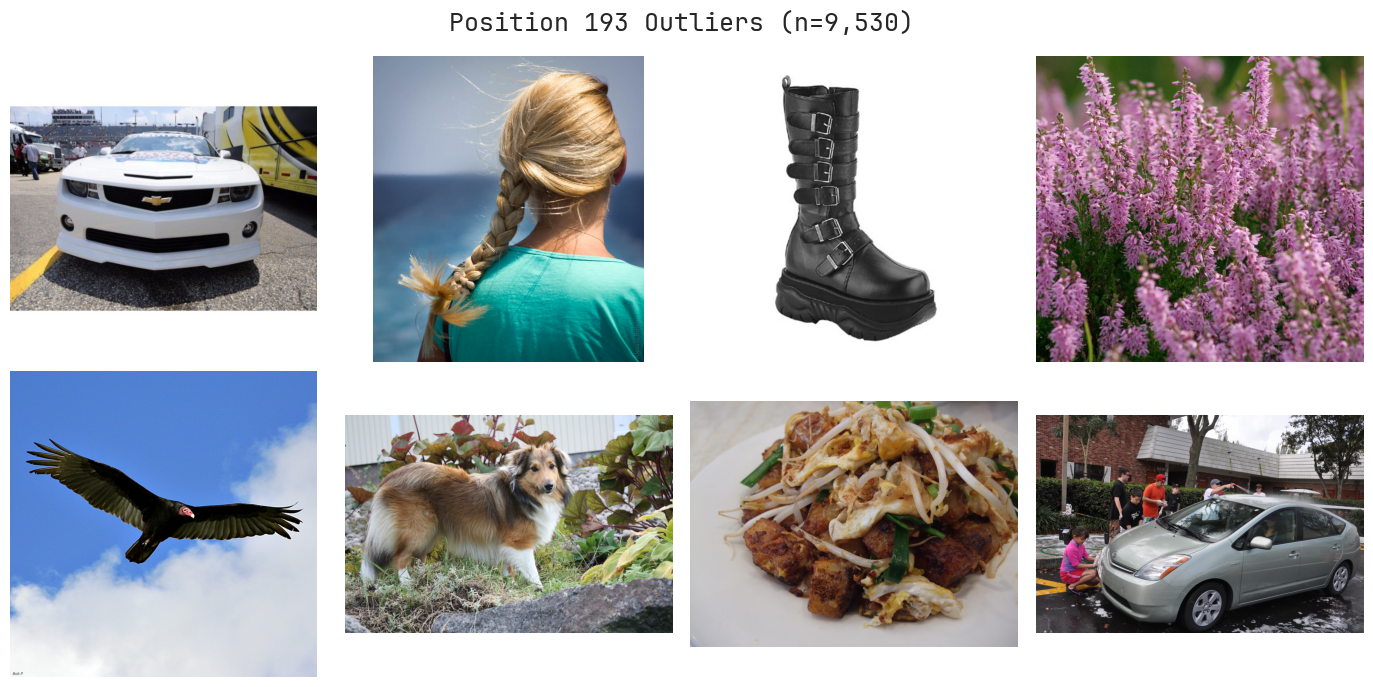

In [4]:
show_sample_images(
    buckets[193], IMAGES_DIR, f"Position 193 Outliers (n={len(buckets[193]):,})"
)

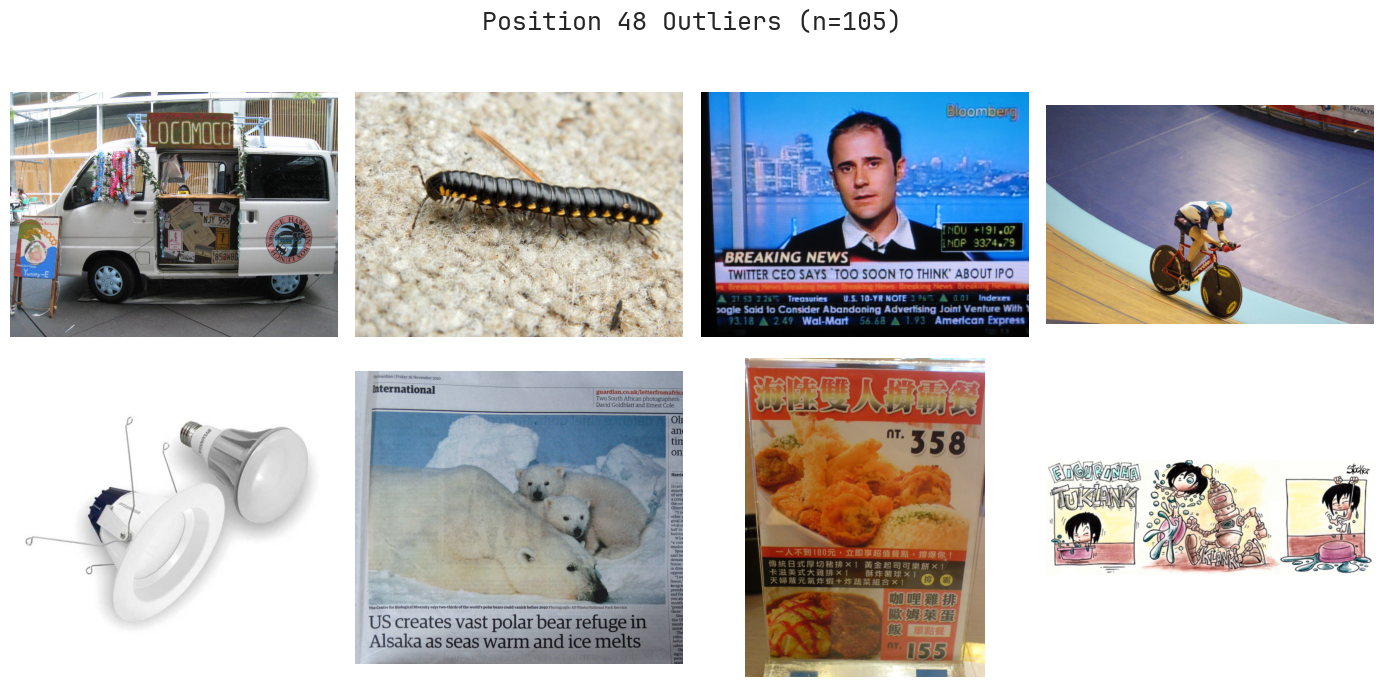

In [5]:
show_sample_images(
    buckets[48], IMAGES_DIR, f"Position 48 Outliers (n={len(buckets[48])})"
)

### Cross-Image Similarity

If position 193 encodes consistent meta-information, embeddings at position 193 should be similar across different images.

Compute cross-image similarity for all 256 positions.

Position 193: 0.912
Mean (all positions): 0.507


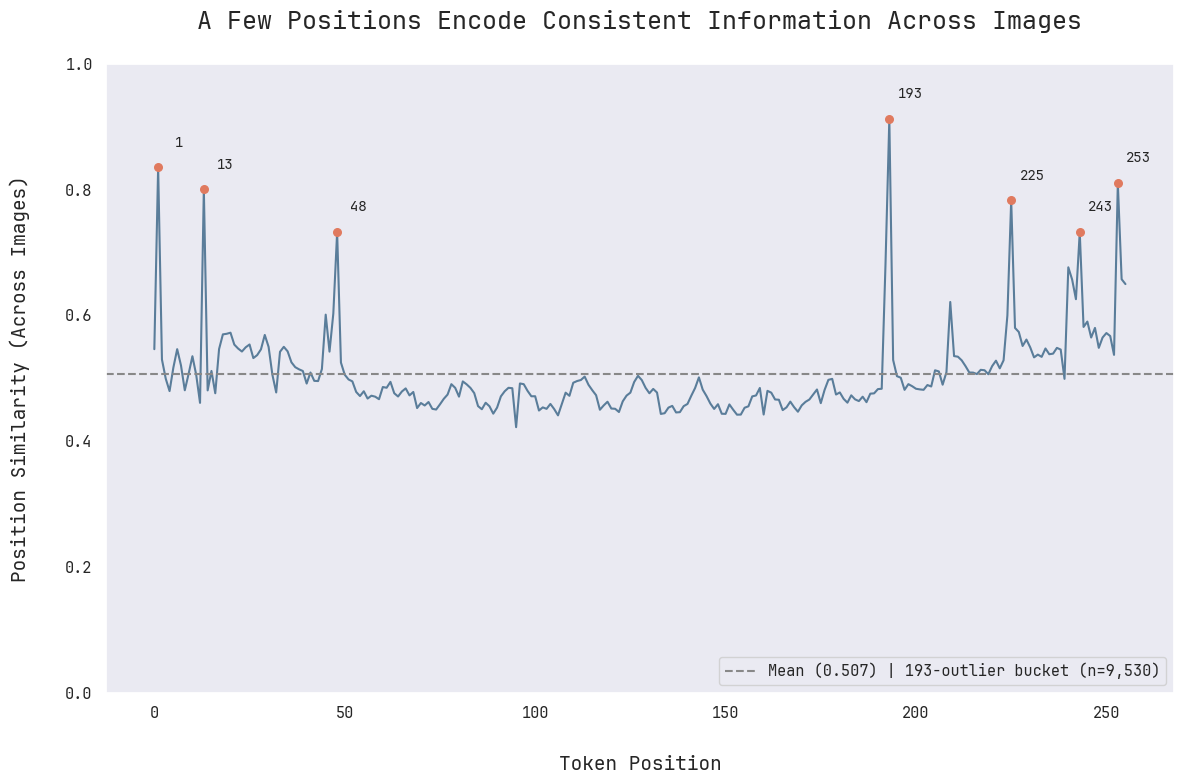

In [6]:
cross_image_sim = compute_cross_image_similarities(buckets[193], conn)

plot_position_similarities(
    cross_image_sim,
    title="A Few Positions Encode Consistent Information Across Images",
    ylabel="Position Similarity (Across Images)",
    threshold=0.7,
    highlight_above=True,
    legend_suffix=f"193-outlier bucket (n={len(buckets[193]):,})",
)

print(f"Position 193: {cross_image_sim[193]:.3f}")
print(f"Mean (all positions): {cross_image_sim.mean():.3f}")

### Interpretation

This plot mirrors Notebook 1, but inverted:

- **Notebook 1:** Position 193 has LOW within-image similarity (dissimilar to other positions)
- **Notebook 3:** Position 193 has HIGH cross-image similarity (consistent across images)

Whatever position 193 encodes, it's the same thing regardless of image content. This supports the hypothesis that outlier positions encode meta-information rather than image-specific content.